* Missing value in one column can be associated with other column. 
    - There are 2 columns search_conducted and search_result. search_consucted can be True or False. If it is False search_result will be missing.

In [3]:
import pandas as pd
import numpy as np
import missingno as msno

* `missingno` is useful to visualize missing values.

In [4]:
air_quality = pd.read_csv("data/air-quality.csv", parse_dates=['Date'], index_col='Date')
diabetes = pd.read_csv("data/pima-indians-diabetes data.csv")

In [58]:
air_quality.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56


In [59]:
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


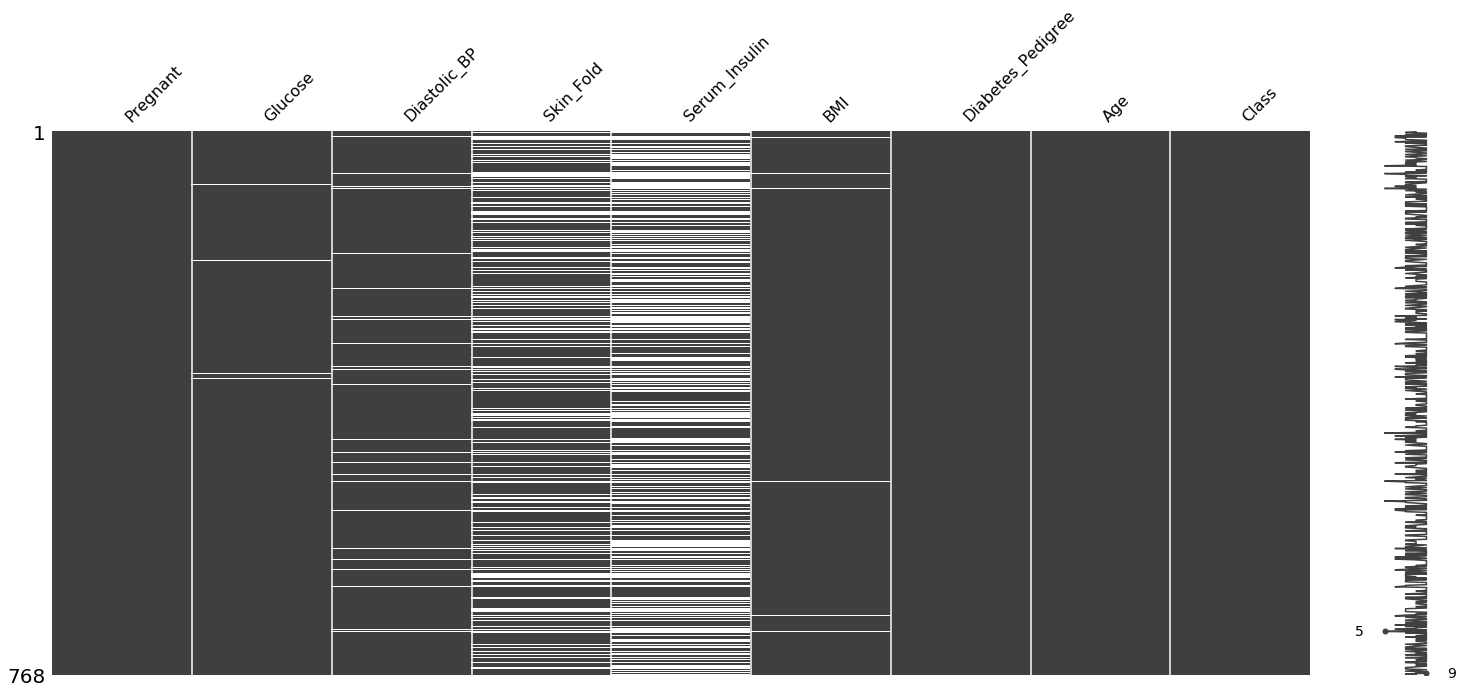

In [7]:
msno.matrix(diabetes)

In [9]:
diabetes.isna().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

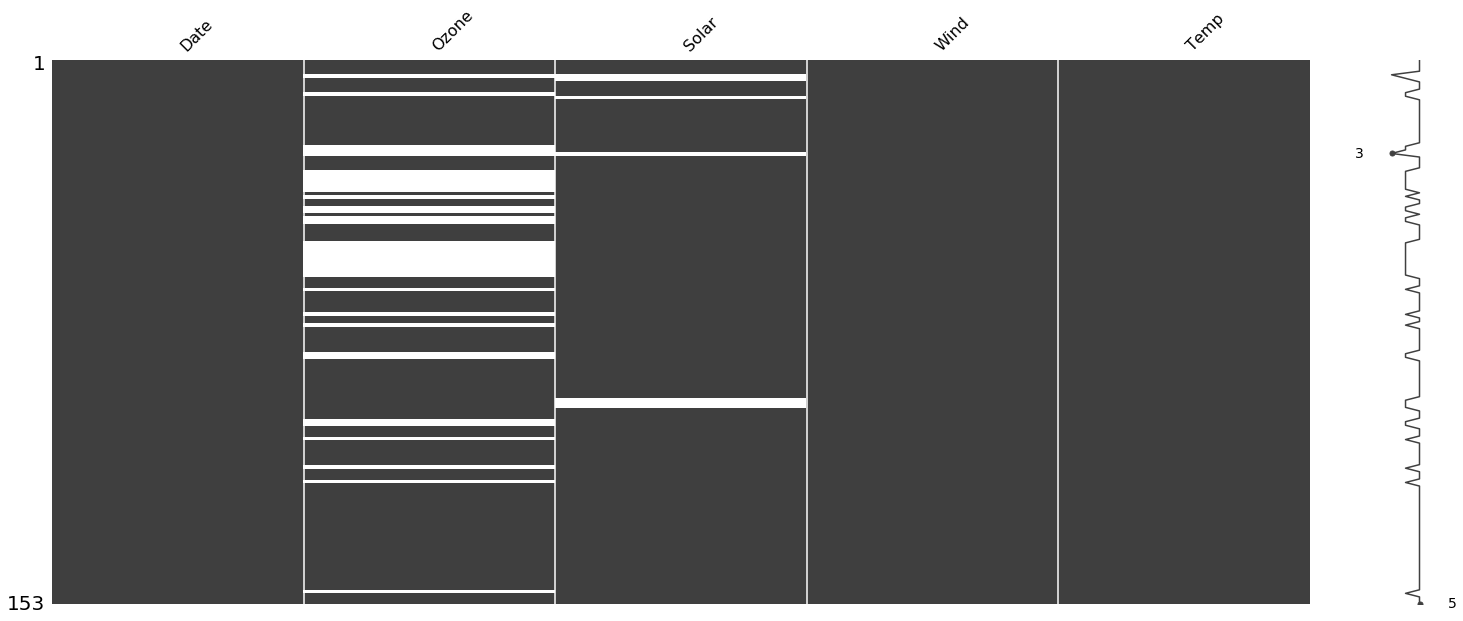

In [8]:
msno.matrix(air_quality)

In [10]:
air_quality.isna().sum()

Date      0
Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

* If we have date indexed df we can use `msno.matrix(df, frq='m')`

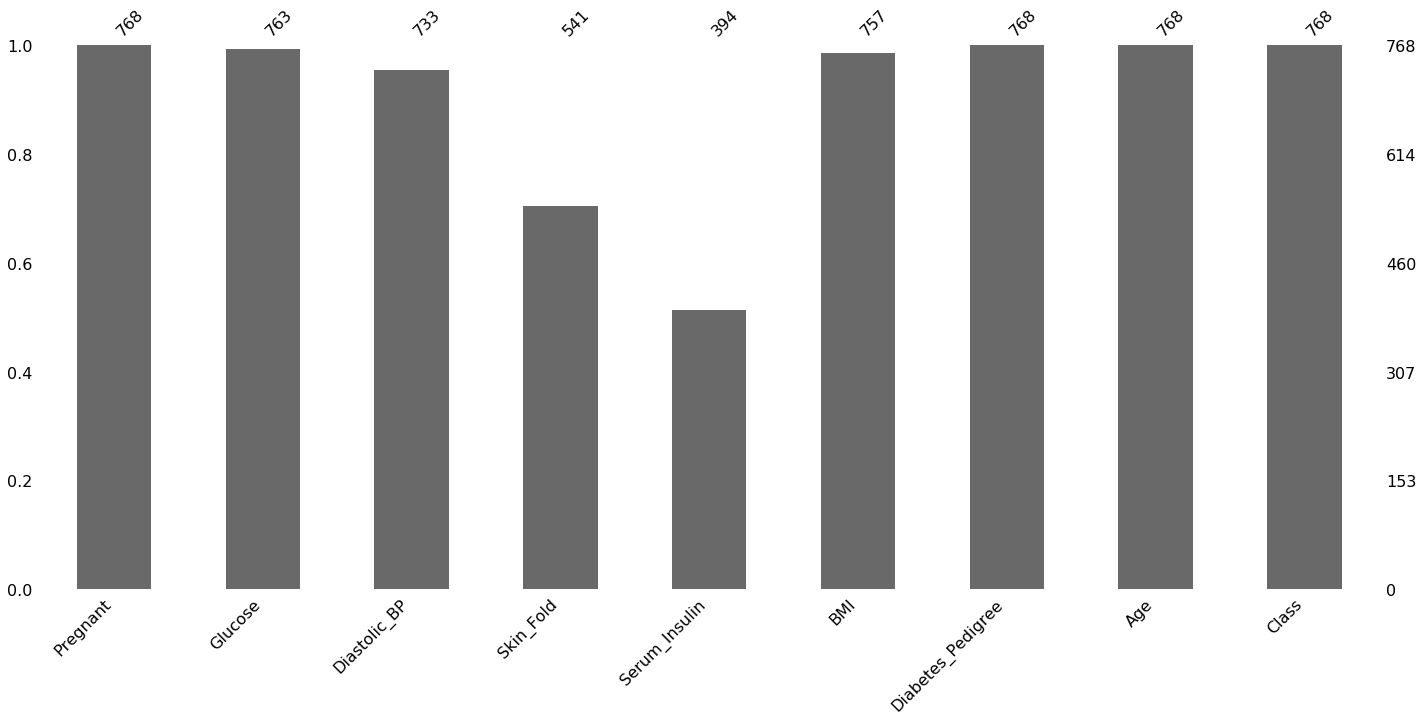

In [14]:
msno.bar(diabetes)

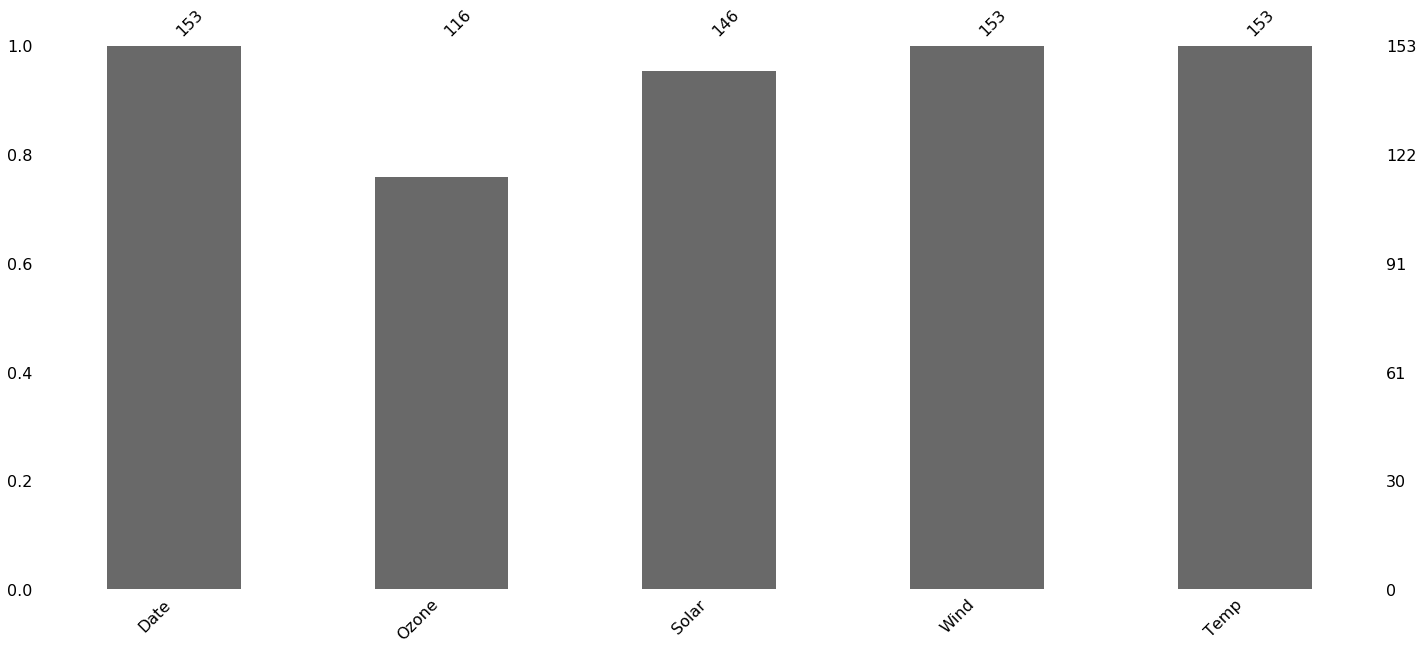

In [15]:
msno.bar(air_quality)

* Does missing value has pattern?
* Does missing value occurs at random?
* Missing value because of another variable?
* To visualize pattern sort_values by different column at visualize df.

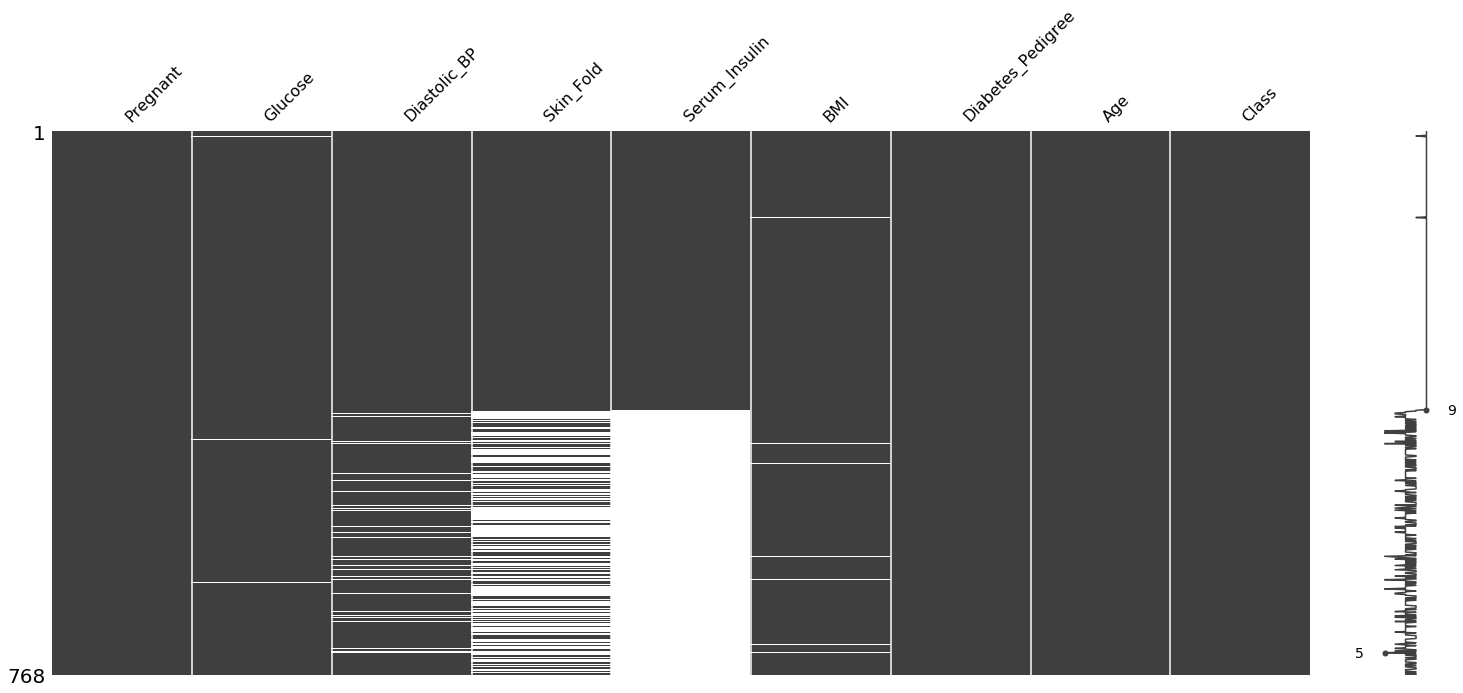

In [24]:
msno.matrix(diabetes.sort_values('Serum_Insulin'))

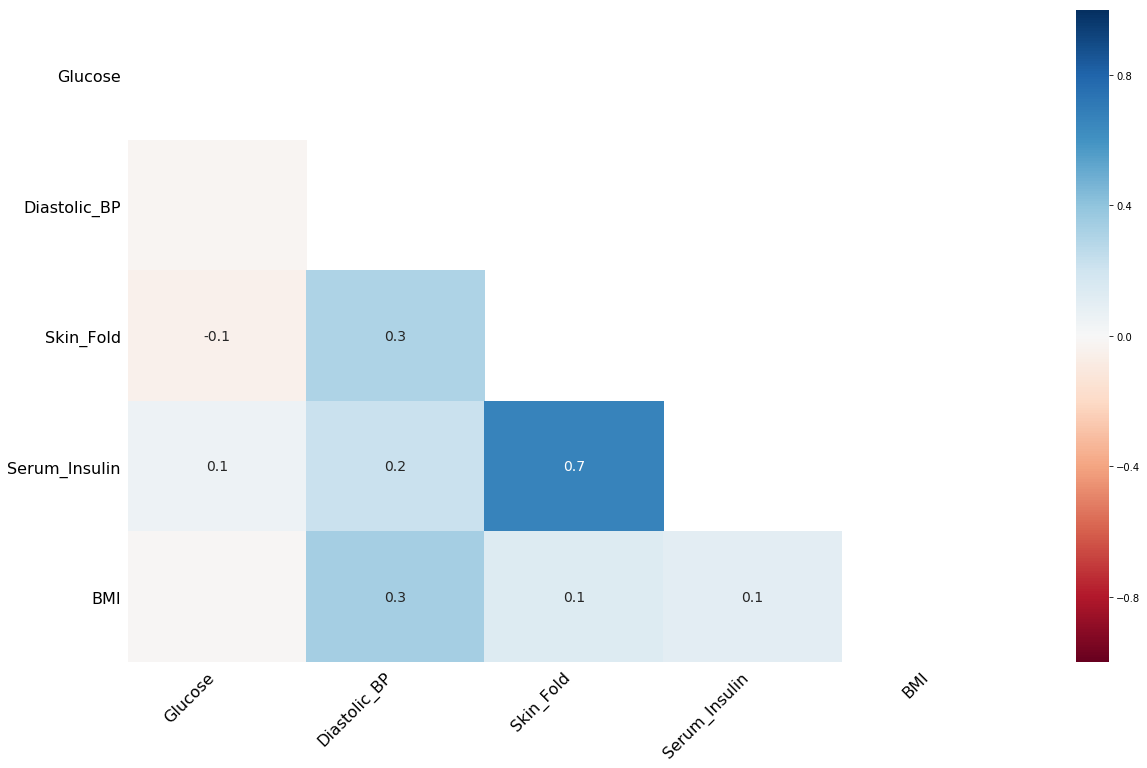

In [17]:
msno.heatmap(diabetes)

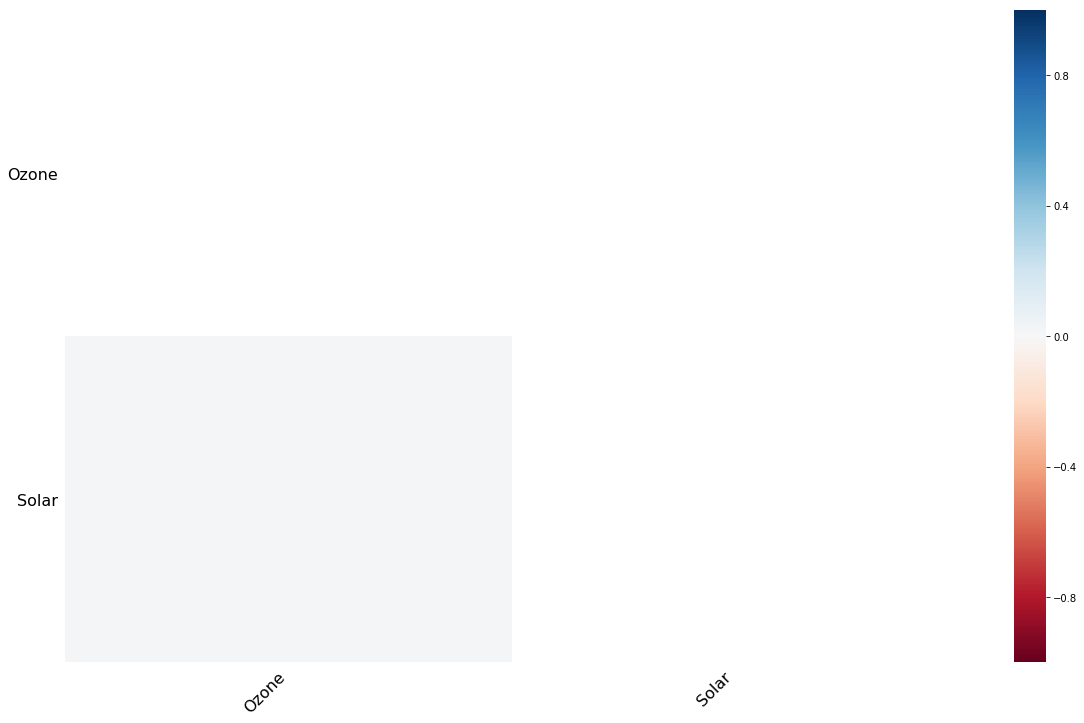

In [18]:
msno.heatmap(air_quality)

* It is plotting correlation of missingness.

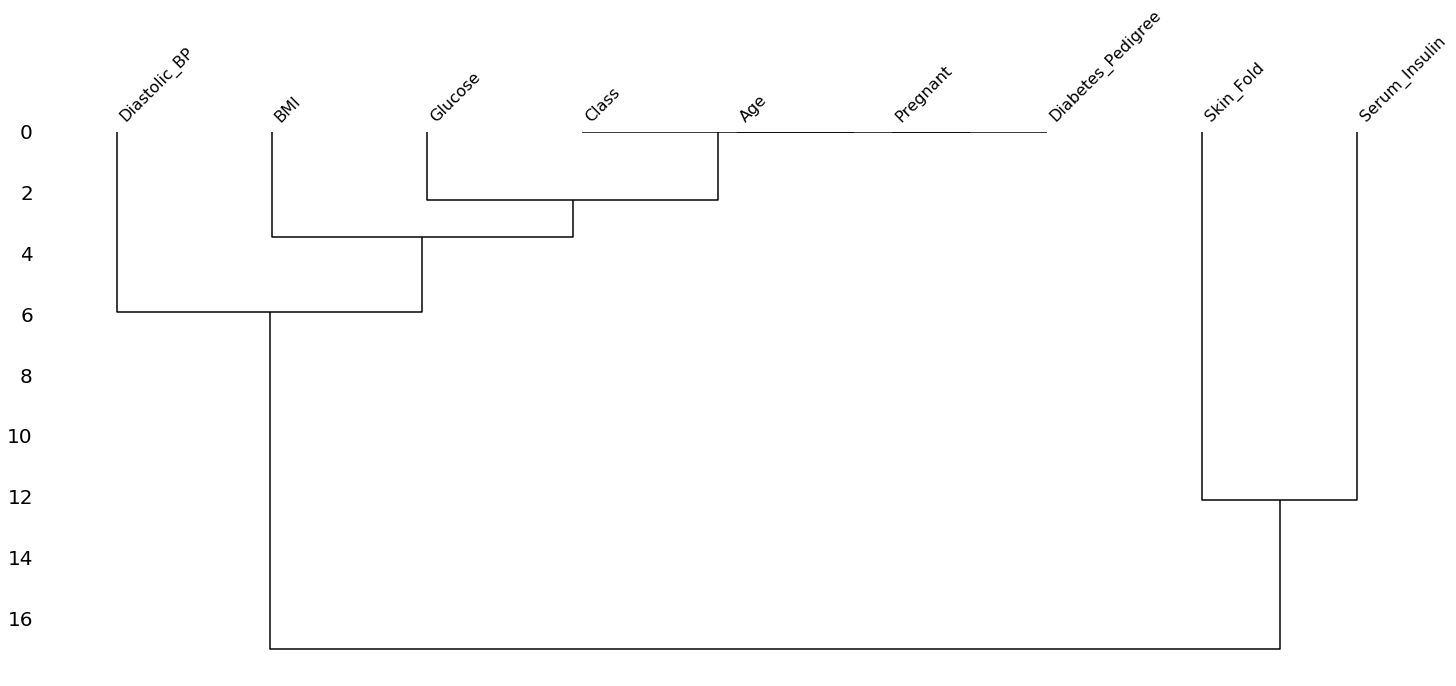

In [19]:
msno.dendrogram(diabetes)

* Shows correlation of variables by grouping them.
* Group similarly grouping similarly missing values together. 

In [21]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnant             768 non-null float64
Glucose              763 non-null float64
Diastolic_BP         733 non-null float64
Skin_Fold            541 non-null float64
Serum_Insulin        394 non-null float64
BMI                  757 non-null float64
Diabetes_Pedigree    768 non-null float64
Age                  768 non-null int64
Class                768 non-null float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [22]:
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
air_quality.isna().sum()

Date      0
Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

--------

### Type of deletion
* Pairwise deletion: Only missing values are ignored. mean() ignores all missing values. Minimize data loss.
* Listwise deletion: Complete row is deleted. Data loss.

### Fill missing values

* Using mean, median, mode or some other constant

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
diabetes_mean = diabetes.copy(deep=True)
diabetes_median = diabetes.copy(deep=True)
diabetes_mode = diabetes.copy(deep=True)
diabetes_const = diabetes.copy(deep=True)

In [37]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')
const_imputer = SimpleImputer(strategy='constant', fill_value=0)

In [38]:
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)
diabetes_const.iloc[:, :] = const_imputer.fit_transform(diabetes_const)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
nullity = diabetes['Serum_Insulin'].isnull() | diabetes['Glucose'].isnull()

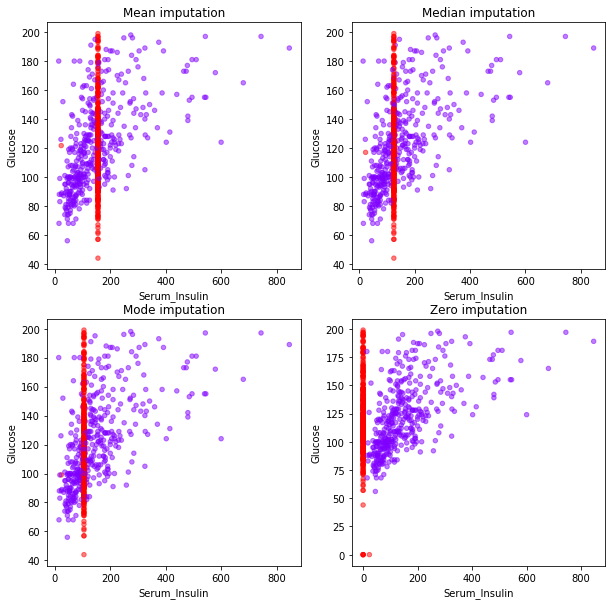

In [55]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
diabetes_mean.plot(x='Serum_Insulin', y='Glucose', kind='scatter', alpha=0.5, c=nullity, 
                   cmap='rainbow', title='Mean imputation',ax=axes[0,0], colorbar=False)
diabetes_median.plot(x='Serum_Insulin', y='Glucose', kind='scatter', alpha=0.5, c=nullity, 
                   cmap='rainbow', title='Median imputation',ax=axes[0,1], colorbar=False)
diabetes_mode.plot(x='Serum_Insulin', y='Glucose', kind='scatter', alpha=0.5, c=nullity, 
                   cmap='rainbow', title='Mode imputation',ax=axes[1,0], colorbar=False)
diabetes_const.plot(x='Serum_Insulin', y='Glucose', kind='scatter', alpha=0.5, c=nullity, 
                   cmap='rainbow', title='Zero imputation',ax=axes[1,1], colorbar=False)

In [60]:
air_quality.isna().sum()

Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

In [61]:
air_quality.isna().mean() * 100

Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64

In [62]:
air_quality.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56


* We can use ffill or bfill strategy to fill the missing values
* interpolate() methods extends the sequence of values to the missing values
    - attribute `method` can be set to linear, quadratic, nearest
    - linear fill missing value by extrapolating straight line from last non missing value
    - nearest is combination of ffill and bfill.

In [63]:
air_quality_ffill = air_quality.copy(deep=True)
air_quality_bfill = air_quality.copy(deep=True)
air_quality_linear = air_quality.copy(deep=True)
air_quality_quad = air_quality.copy(deep=True)
air_quality_nearest = air_quality.copy(deep=True)

In [64]:
air_quality_ffill.fillna(method='ffill', inplace=True)

In [66]:
air_quality_bfill.fillna(method='bfill', inplace=True)

In [67]:
air_quality_linear.interpolate(method='linear', inplace=True)
air_quality_quad.interpolate(method='quadratic', inplace=True)
air_quality_nearest.interpolate(method='nearest', inplace=True)

In [68]:
air_quality_ffill.Ozone[30:39]

Date
1976-05-31    37.0
1976-06-01    37.0
1976-06-02    37.0
1976-06-03    37.0
1976-06-04    37.0
1976-06-05    37.0
1976-06-06    37.0
1976-06-07    29.0
1976-06-08    29.0
Name: Ozone, dtype: float64

In [69]:
air_quality_bfill.Ozone[30:39]

Date
1976-05-31    37.0
1976-06-01    29.0
1976-06-02    29.0
1976-06-03    29.0
1976-06-04    29.0
1976-06-05    29.0
1976-06-06    29.0
1976-06-07    29.0
1976-06-08    71.0
Name: Ozone, dtype: float64

In [70]:
air_quality_linear.Ozone[30:39]

Date
1976-05-31    37.000000
1976-06-01    35.857143
1976-06-02    34.714286
1976-06-03    33.571429
1976-06-04    32.428571
1976-06-05    31.285714
1976-06-06    30.142857
1976-06-07    29.000000
1976-06-08    50.000000
Name: Ozone, dtype: float64

In [71]:
air_quality_quad.Ozone[30:39]

Date
1976-05-31    37.000000
1976-06-01   -38.361123
1976-06-02   -79.352735
1976-06-03   -85.974836
1976-06-04   -62.354606
1976-06-05   -33.255133
1976-06-06    -2.803598
1976-06-07    29.000000
1976-06-08    62.155660
Name: Ozone, dtype: float64

In [72]:
air_quality_nearest.Ozone[30:39]

Date
1976-05-31    37.0
1976-06-01    37.0
1976-06-02    37.0
1976-06-03    37.0
1976-06-04    29.0
1976-06-05    29.0
1976-06-06    29.0
1976-06-07    29.0
1976-06-08    29.0
Name: Ozone, dtype: float64

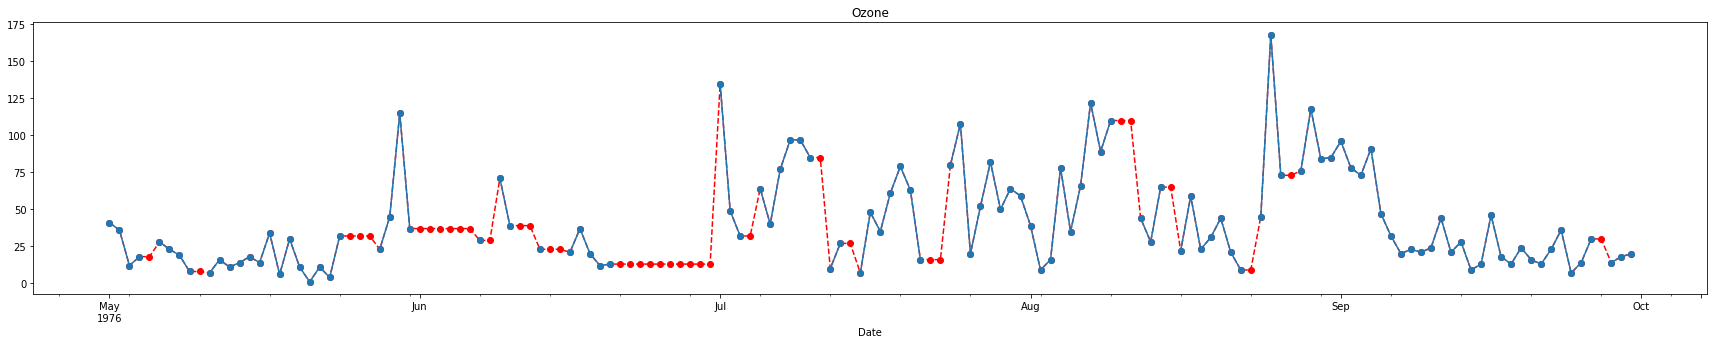

In [76]:
air_quality_ffill.Ozone.plot(c='r', marker='o', linestyle='--', figsize=(30,5) )
air_quality.Ozone.plot(title='Ozone', marker='o')

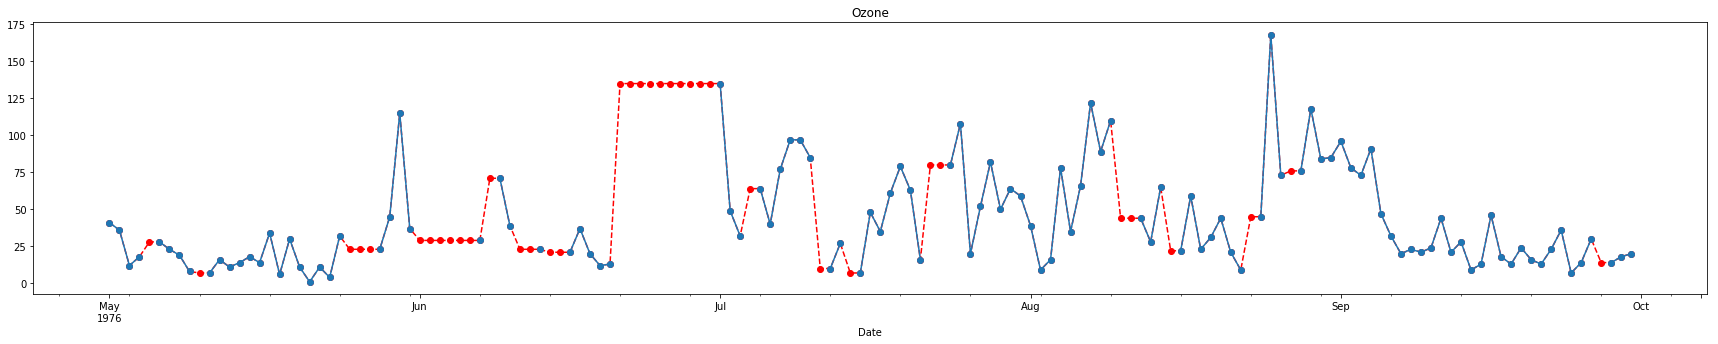

In [77]:
air_quality_bfill.Ozone.plot(c='r', marker='o', linestyle='--', figsize=(30,5) )
air_quality.Ozone.plot(title='Ozone', marker='o')

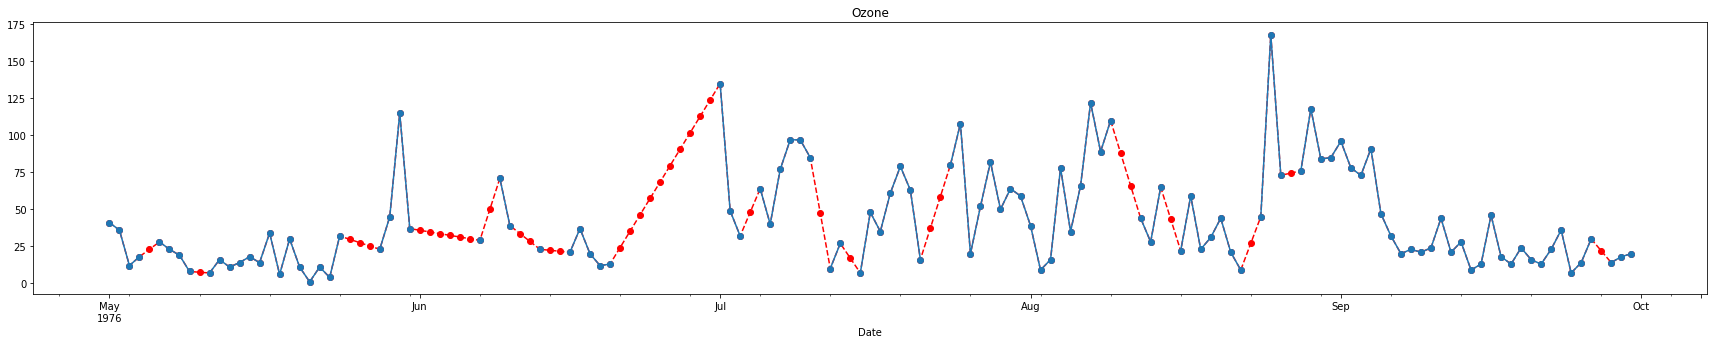

In [78]:
air_quality_linear.Ozone.plot(c='r', marker='o', linestyle='--', figsize=(30,5) )
air_quality.Ozone.plot(title='Ozone', marker='o')

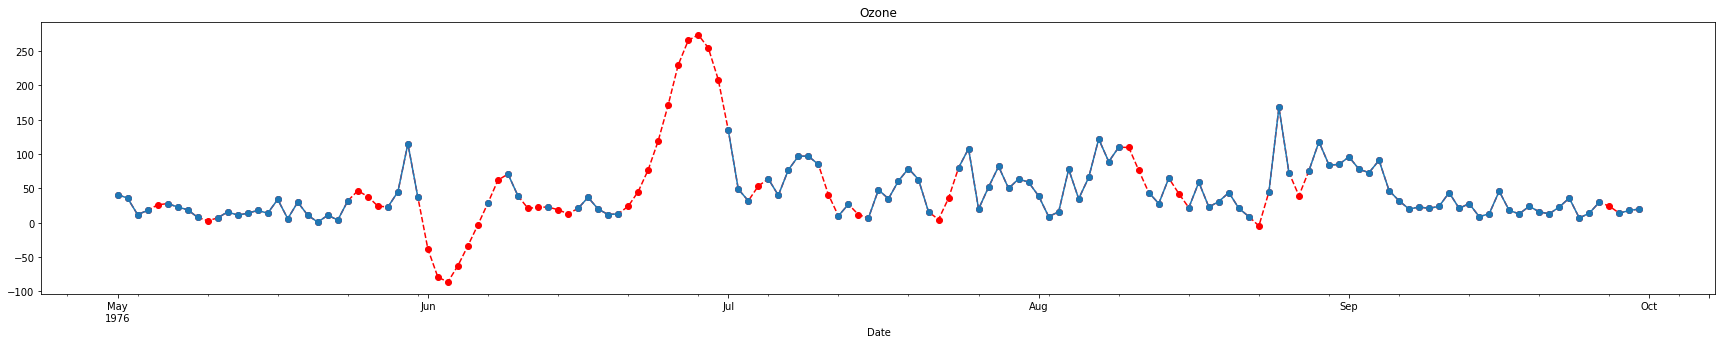

In [79]:
air_quality_quad.Ozone.plot(c='r', marker='o', linestyle='--', figsize=(30,5) )
air_quality.Ozone.plot(title='Ozone', marker='o')

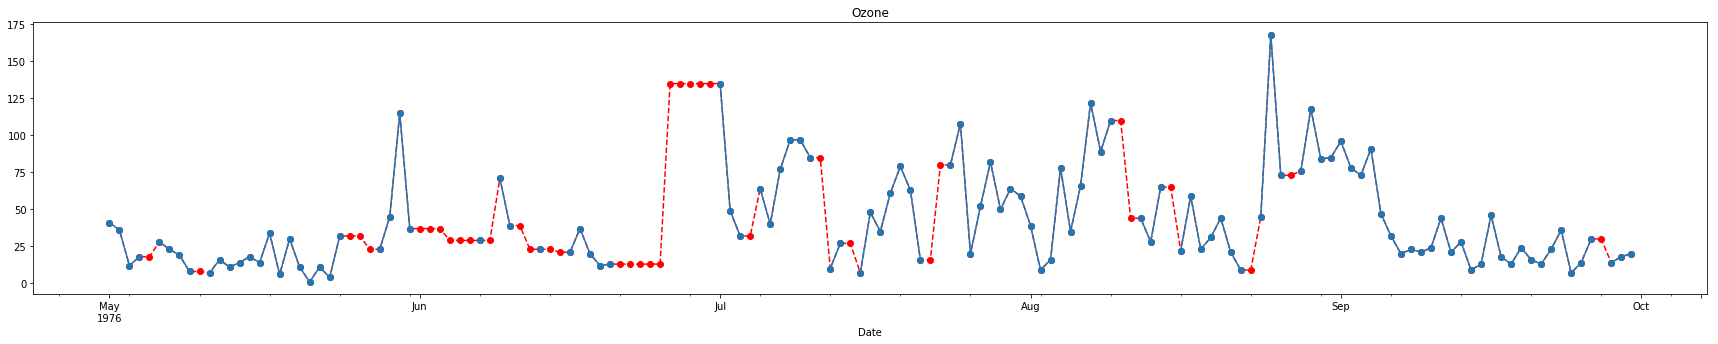

In [80]:
air_quality_nearest.Ozone.plot(c='r', marker='o', linestyle='--', figsize=(30,5) )
air_quality.Ozone.plot(title='Ozone', marker='o')

### `fancyimpute` package
* Use ML algo to impute missing values
* In all above technique only respective column is used to fill missing values.
* Here we use other columns as well.
* KNN
* MICE (Multiple imputation by chained equation)
    - Perform multiple regression over sample of data

```
from fancyimpute import KNN
knn_imputer = KNN()
diabetes_knn = diabates.copy(deep=True)
diabaetes_knn.iloc[:,:] = knn_imputer.fit_transform(diabetes_knn)
```

```
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
diabetes_MICE = diabates.copy(deep=True)
diabaetes_MICE.iloc[:,:] = MICE_imputer.fit_transform(diabetes_MICE)
```

### Handle categorical data
* First convert to numerical value using one-hot encoder or ordinal encoder.
* Then use KNN or MICE.
* Then convert back to categorical values.

* Using measures like R2 values we can check how well ML model performed with different imputation strategy.
* Observe the density plot and see which resembles the original data.

In [7]:
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

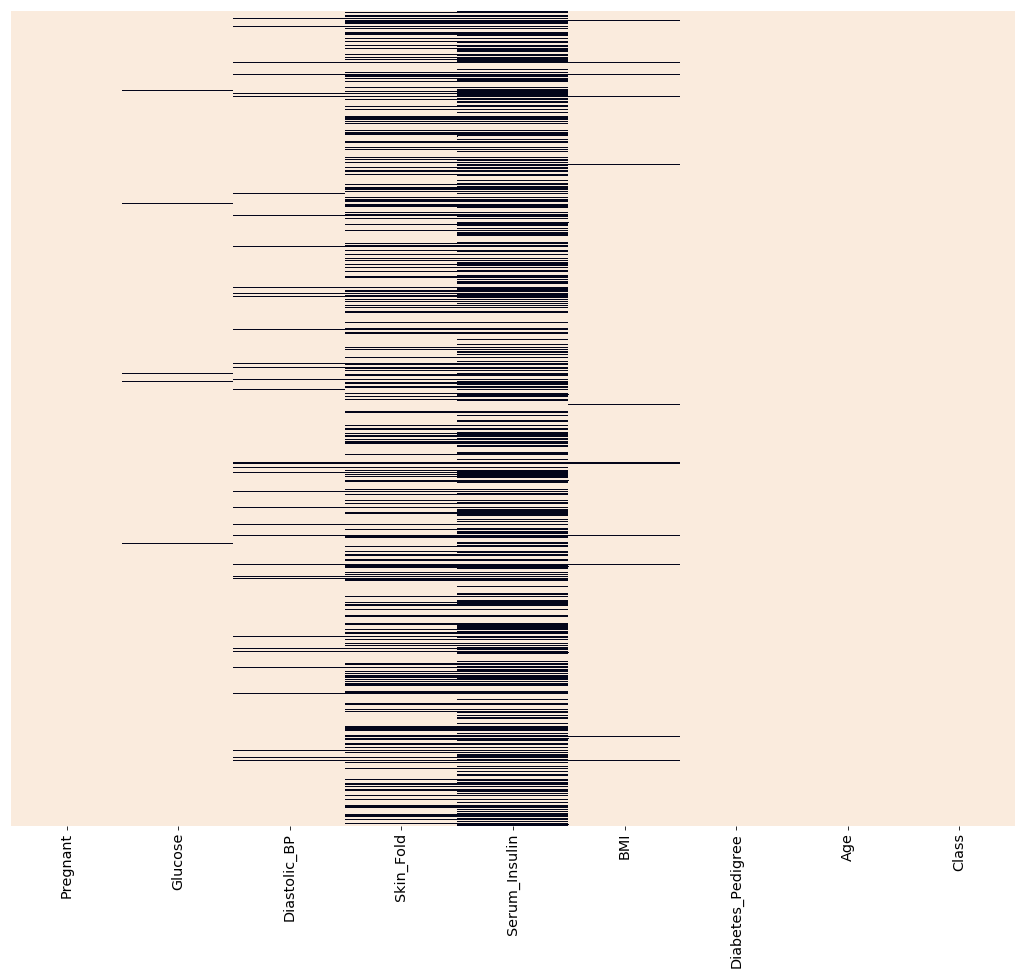

In [8]:
plot_null_matrix(diabetes)

In [9]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

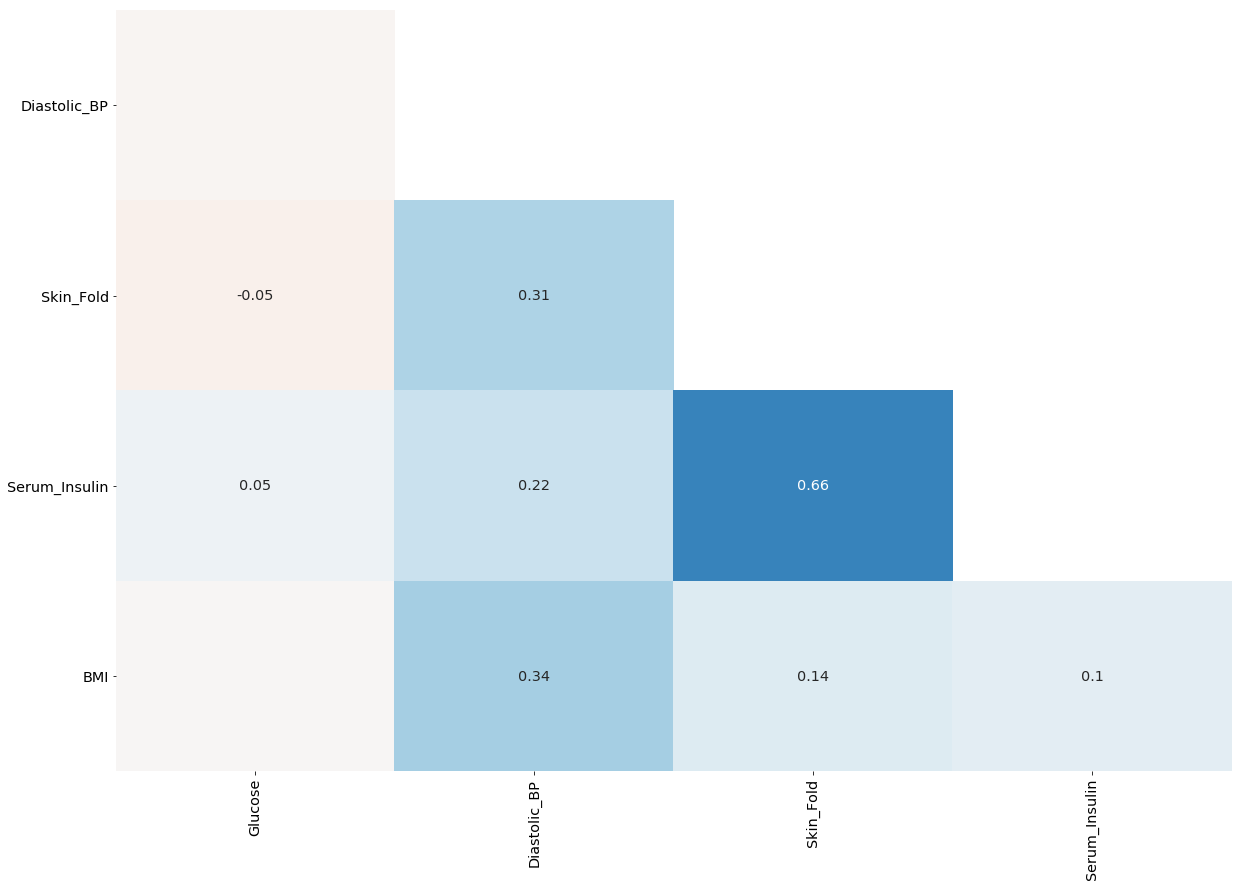

In [10]:
plot_null_correlations(diabetes)

* Missing data can cause bias and less efficiency.
* If randomly missing values are removed it will not cause bias, but decrease sample size. If specific set of data is missing it will create bias as not sample is not representative of original population.
* Delete the record if feature is missing which is needed for current analysis, otherwise do not delete it.
* Hot deck imputation
    - Missing values are randomly imputed by selecting similar record like ffill, bfill
    - May increase bias
* Cold deck imputation
    - Select donor from other dataset to fill missing values.